# Import libraries

In [87]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model

# Testing if the model is working

In [33]:
model=load_model('eye_detector_model.h5')

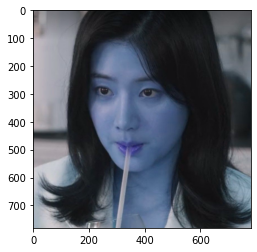

In [2]:
picture=cv2.imread('ASIANSTUFF.jfif')
plt.imshow(picture)

In [4]:
picture.shape

(781, 781, 3)

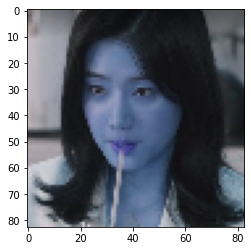

In [5]:
img=cv2.resize(picture,(83,83))
img.shape
plt.imshow(img)

In [6]:
img=np.expand_dims(img,axis=0)
img.shape

(1, 83, 83, 3)

In [40]:
prediction=np.argmax(model.predict(img))
prediction

0

# Mobilenet model

Model that we will be using to detect if the eyes are close or not.

In [2]:
last_model=load_model('Last model.h5')

# Left and right eye detection

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import serial
import time
import pyfirmata
import smtplib,ssl
import time
from datetime import datetime

Load models that detects left and right eye

In [3]:
left_eye=cv2.CascadeClassifier('left_eye.xml')
right_eye=cv2.CascadeClassifier('right_eye.xml')

last_model=load_model('Last model.h5')

Defining fonts for text

In [4]:
font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,500)
fontScale              = 1
fontColor_green        = (0,255,0)
fontColor_red           =(0,0,255)
lineType               = 2


### Width and height of our program 

In [6]:
width=webcam.get(cv2.CAP_PROP_FRAME_WIDTH)
height=webcam.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps=webcam.get(cv2.CAP_PROP_FPS)

print('the width is :',width)
print('the height is:',height)

the width is : 640.0
the height is: 480.0


In [13]:
#capture from our webcam
webcam=cv2.VideoCapture(1)

#score that acts as threshold
score=0
#connect to our arduino
board=pyfirmata.Arduino('COM3')


def eye_detector():
    while True:
        
        #read from the webcam
        success,capture=webcam.read()
        
        ###LEFT EYE
        #convert the image from our webcam to gray scale image
        #ONCE WE CONVERTED THE IMAGE TO GRAYSCALE HERE, WE DONT NEED TO CONVERT IT AGAIN WHEN READING THE RIGHT/LEFT EYE
        image=cv2.cvtColor(capture,cv2.COLOR_BGR2GRAY)
    
        #use the eye detector object defined above to detect the left eye
        left_eye_detector=left_eye.detectMultiScale(image,scaleFactor=1.1,minNeighbors=3)
        
        #make a rectangle to show where the detected left eye is
        for x,y,w,h in left_eye_detector:
            cv2.rectangle(capture,(x,y),(x+w,y+h),(0,255,0),1)
            #just select the left eye as an image.
            #capture[x:x+w,y:t+h] means that section of the picture(from our webcam)
            left_eye_outline=capture[x:x+w,y:y+h]
            
            
            #preprocessing steps
            #resize the image captured like our convolutional layer specified
            left_eye_outline=cv2.resize(left_eye_outline,(83,83))
            #normalize the image captured
            left_eye_outline=left_eye_outline/255
            #expand the dimension of our picture because due to our convolutional layers
            left_eye_outline=np.expand_dims(left_eye_outline,axis=0)
            
            #use our model to predict if the left eye is closed or not
            
            left_eye_prediction=np.argmax(last_model.predict(left_eye_outline))
            print(left_eye_prediction)
    
             
                
            #if the model predicted the left eye is closed, then we output some text
            if left_eye_prediction==0:
                #declare the score variable as global
                global score
                #if the left eyes closes we will increase the score
                score+=1
                cv2.putText(capture,'left eye closed',(x,y),font,fontScale,fontColor_red,lineType)
            else:
                #if the left eye closes, we ill decrease the score
                score-=1
                cv2.putText(capture,'left eye open',(x,y),font,fontScale,fontColor_green,lineType)
        
            
            
        ###RIGHT EYE
        right_eye_detector=right_eye.detectMultiScale(image,scaleFactor=1.1,minNeighbors=3)
        
        #make a rectangle to show where the detected right eye is
        for x,y,w,h in right_eye_detector:
            cv2.rectangle(capture,(x,y),(x+w,y+h),(100,0,0),1)
            
            right_eye_outline=capture[x:x+w,y:y+h]
            
            
            #preprocessing steps
            #resize the image captured like our convolutional layer specified
            right_eye_outline=cv2.resize(right_eye_outline,(83,83))
            #normalize the image captured
            right_eye_outline=right_eye_outline/255
            #expand the dimension of our picture because due to our convolutional layers
            right_eye_outline=np.expand_dims(right_eye_outline,axis=0)
            
            #use our model to predict if the left eye is closed or not
            
            right_eye_prediction=np.argmax(last_model.predict(right_eye_outline))
            print(right_eye_prediction)
          
    
   
            #if the model predicted the left eye is closed, then we output some text
            if right_eye_prediction==0:
                #if the left eye closes we will increase the score
                score+=1
                cv2.putText(capture,'right eye closed',(x-100,y),font,fontScale,fontColor_red,lineType)
            else:
                #if the left eye opens we will decrease the score
                score-=1
                cv2.putText(capture,'left eye open',(x,y),font,fontScale,fontColor_green,lineType)

        
        print(score)
        
        
        
        #display the score on the screen
        cv2.putText(capture,str(score),(320,40),font,fontScale,fontColor_green,lineType)
        #if the score passes the threshold, the text will change to read
        if score>50:
            cv2.putText(capture,str(score),(320,40),font,fontScale,fontColor_red,lineType)
            #####buzzer
            #make the buzzer sound
            board.digital[3].write(1)
            #delay
            time.sleep(0.1)
            #turn off the sound
            board.digital[3].write(0)
            #delay
            time.sleep(0.1)
            #call the send email function
            send_email()
                  
            
        
        #show the video
        cv2.imshow('video',capture)

        #if press q, the windows will stop and will not break the kernel. then, can edit the script again
        if cv2.waitKey(1)&0xFF==ord('q'):
            cv2.destroyAllWindows() 
            break
          
            
            


In [11]:
eye_detector()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


# Script for arduino

To install the library that will connect our script with arduino


!pip install serial


!pip install pyfirmata

In [6]:
import serial
import time
import pyfirmata
serial.__version__

'3.5'

# Turn on and off the led

 It is important to note that we are using a b in front of the command we are sending. This is to tell Python to encode the string before sending it. Remember that Arduino works with bytes, and therefore we must tell Python to transform a string to bytes before sending it

In [ ]:
while True:   
    ser=serial.Serial('COM6',9800,timeout=1)
    #a delay is needed so that our arduino have the time to receive commands after openning the communication
    time.sleep(0.5)
    ser.write(b'H')   # send the pyte string 'H'
    time.sleep(0.5)   # wait 0.5 seconds
    ser.write(b'L')   # send the byte string 'L'
    ser.close()

# Integration with buzzer

#### Firmata is a protocol for communicating with microcontrollers from software on a computer 

#### Standard firmata is basically a client that will get the python code and translate it to our arduino

To integrate arduino with python,


1.Upload standard firmata code to board.

2.Import pyfirmata to establish a connection

In [19]:

#establish a connection
board=pyfirmata.Arduino('COM3')

#use a while loop to keep running the code
while True:
    #digital input=1
    board.digital[3].write(1)
    #delay
    time.sleep(0.1)
    #digital input=0
    board.digital[3].write(0)
    #delay
    time.sleep(0.1)

SerialTimeoutException: Write timeout

# Sending email

Securing a SMTP connection

1.with smtp_ssl=with this the email sent will already be encrypted

2.send an unsecured SMTP connect that can be encrypted using .starttls()

In [9]:
import smtplib,ssl
import time
from datetime import datetime

In [6]:
aliff_email=''

In [5]:
sender_email='jean.jacque.locke@gmail.com'
receiver_email='jean.jacque.locke@gmail.com'
now=datetime.now()

In [6]:
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 20:40:15


In [7]:
def send_email():
    now=datetime.now()
    current_time = now.strftime("%H:%M:%S")
    #establish a connection
    server=smtplib.SMTP('smtp.gmail.com',587)
    #command sent by the email server to identify itself when connecting to another email server
    #so that the process of sending email can be done
    server.ehlo()
    
    #command to inform email server that the email client wants to upgrade from an insecure connection to a secure one
    server.starttls()

    server.ehlo()
    #login our developer email
    server.login(sender_email,password=password)
    
    #format of our email
    subject='SLEEPING DETECTED'
    body=f'Your client was sleeping at{current_time}'
    mssg=f' Subject: {subject}\n\n{body}'
    
    #send the email    
    server.sendmail(sender_email,receiver_email,msg=mssg)
    print('email has been sent')
    #quit the server
    #server.quit()

In [23]:
send_email()

email has been sent
